In [1]:
from qaravan.algebraQ import *
from qaravan.core import *

# Test

In [5]:
A = random_su2()
is_special_unitary(A)

True

In [6]:
# 2 qubit example, full string probabilities
U = random_matchgate()
circ = Circuit([Gate('M', [0,1], U)], 2)
_, Rp = circuit_to_R(circ)

basis = generate_basis(2)
probs, other_probs = [], []
for instring in basis:
    for outstring in basis: 
        x = string_to_sv(instring, 2)
        y = string_to_sv(outstring, 2)
        prob = x.conj().T @ U.conj().T @ np.outer(y, y.conj()) @ U @ x
        probs.append(prob)
        
        prob = probability(instring, outstring, circ)
        other_probs.append(prob)

np.allclose(probs, other_probs)

True

In [7]:
# 2 qubit example, partial string probabilities
instring = '00'
x = string_to_sv(instring, 2)
xp = U @ x 
print(pretty_print_sv(xp, 2))

prob = np.abs(xp[0])**2  # probability of zero on first qubit
other_prob = probability(instring, '0i', circ)
print(prob, other_prob)

0.2978-0.5597j|00⟩ + -0.0799+0.7692j|11⟩
0.40187853040478994 0.4018785304047902


In [8]:
# 4 qubit example, full string probabilities
U1 = random_matchgate()
U2 = random_matchgate()
U3 = random_matchgate()

n = 4
circ = Circuit([Gate('M', [0,1], U1), Gate('M', [2,3], U2), Gate('M', [1,2], U3)], n)
U = circ_to_mat(circ, n)
_, Rp = circuit_to_R(circ)

basis = generate_basis(n)
probs, other_probs = [], []
for instring in basis:
    for outstring in basis: 
        x = string_to_sv(instring, 2)
        y = string_to_sv(outstring, 2)
        prob = x.conj().T @ U.conj().T @ np.outer(y, y.conj()) @ U @ x
        probs.append(prob)

        prob = probability(instring, outstring, circ)
        other_probs.append(prob)

np.allclose(probs, other_probs)

True

In [202]:
# test sampling
instring = '0000'
true_probs = [probability(instring, outstring, circ) for outstring in basis]
samples = [sample(instring, circ) for _ in range(5000)]

In [206]:
avgs = []
vars = []
num_instances = 10
for num_samples in np.arange(10,5000,10):
    distances = []
    for _ in range(num_instances):
        sub_samples = list(np.random.choice(samples, num_samples, replace=False))
        sample_probs = [sub_samples.count(outstring)/num_samples for outstring in basis]
        distances.append(1-hellinger_fidelity(true_probs, sample_probs))

    avgs.append(np.mean(distances))
    vars.append(np.var(distances))

slope is  -1.1453147232472756


Text(0.5, 1.0, 'power law convergence due Monte Carlo bound')

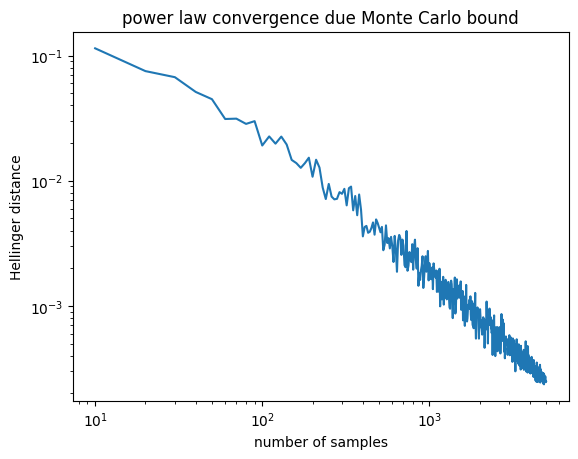

In [210]:
# find power law coefficient 
x = np.log(np.arange(10,5000,10))
y = np.log(avgs)
coeff = np.polyfit(x, y, 1)
print("slope is ", coeff[0])

plt.plot(np.arange(10,5000,10), avgs)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('number of samples')
plt.ylabel('Hellinger distance')
plt.title('power law convergence due Monte Carlo bound')

# Comparison against Francesca

In [10]:
from qaravan.tensorQ.initializations import random_unitary


U = random_unitary(2)
generate_R(2, U, [0,1]) 

AssertionError: R is not special orthogonal

In [9]:
U.shape 

(16, 16)

In [15]:
U = expm(1j*np.kron(pauli_X, pauli_X)) 
R, Rt = generate_R(2, U, [0,1])
print(R)

[[ 1.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j -0.41614684+0.j -0.90929743+0.j  0.        +0.j]
 [ 0.        +0.j  0.90929743+0.j -0.41614684+0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  1.        +0.j]]


In [24]:
circ = Circuit([Gate('M', [0,1], U)], 2)
instring = '00'
outstring = '00'
probability(instring, outstring, circ)

np.float64(0.29192658172642877)

In [19]:
print(Rt/2)

[[ 0.5       +0.j          0.        -0.20807342j  0.        +0.45464871j
   0.        +0.j        ]
 [ 0.        +0.j         -0.45464871+0.j         -0.20807342+0.j
   0.        +0.5j       ]]


In [21]:
H = block_diag(*[np.array([[1,1j], [-1j,1]])] * 2)
H

array([[ 1.+0.j,  0.+1.j,  0.+0.j,  0.+0.j],
       [-0.-1.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+1.j],
       [ 0.+0.j,  0.+0.j, -0.-1.j,  1.+0.j]])

In [23]:
labels = generate_labels('00', '00')
exp_mat(2, labels, Rt/2)

array([[ 0.        +0.00000000e+00j,  0.29192658+0.00000000e+00j,
         0.        -4.54648713e-01j,  0.        +0.00000000e+00j],
       [-0.29192658-0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +2.77555756e-17j,  0.        -4.54648713e-01j],
       [-0.        +4.54648713e-01j, -0.        -2.77555756e-17j,
         0.        +0.00000000e+00j,  0.29192658+0.00000000e+00j],
       [-0.        -0.00000000e+00j, -0.        +4.54648713e-01j,
        -0.29192658-0.00000000e+00j,  0.        +0.00000000e+00j]])

In [9]:
ops = generate_majorana_ops(2)

In [14]:
U = expm(ops[1] @ ops[2])
R, Rt = generate_R(2, U, [0,1])
print(R)

[[ 1.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j -0.41614684+0.j -0.90929743+0.j  0.        +0.j]
 [ 0.        +0.j  0.90929743+0.j -0.41614684+0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  1.        +0.j]]


In [3]:
zi = np.kron(pauli_Z, pauli_I)
iz = np.kron(pauli_I, pauli_Z)
xx = np.kron(pauli_X, pauli_X)
yy = np.kron(pauli_Y, pauli_Y)
xy = np.kron(pauli_X, pauli_Y)
yx = np.kron(pauli_Y, pauli_X)

a = np.random.rand(6)
H = a[0] * zi + a[1] * iz + a[2] * xx + a[3] * yy + a[4] * xy + a[5] * yx

In [5]:
print(expm(-1.j*H))

[[-0.14381263-0.89258311j  0.        +0.j          0.        +0.j
  -0.3274851 -0.2745302j ]
 [ 0.        +0.j          0.16227552-0.17887748j  0.01650446-0.97025621j
   0.        +0.j        ]
 [ 0.        +0.j         -0.01650446-0.97025621j  0.16227552+0.17887748j
   0.        +0.j        ]
 [ 0.3274851 -0.2745302j   0.        +0.j          0.        +0.j
  -0.14381263+0.89258311j]]


In [6]:
a

array([0.90108237, 0.64587601, 0.93003492, 0.45423968, 0.2955599 ,
       0.27201281])

# Non-matchgate decomposition

In [2]:
def is_unitary(U): 
    return np.allclose(U.conj().T @ U, np.eye(U.shape[0])) and np.allclose(U @ U.conj().T, np.eye(U.shape[0]))

def is_matchgate(G): 
    A = np.array([[G[0,0], G[0,3]], 
                  [G[3,0], G[3,3]]])
    B = G[1:3, 1:3]
    return is_unitary(A) and is_unitary(B) and np.allclose(np.linalg.det(A), np.linalg.det(B))

In [15]:
# CZ decomposition
mat = 0.5 * (np.kron(pauli_I, pauli_I) + np.kron(pauli_Z, pauli_I) + np.kron(pauli_I, pauli_Z) - np.kron(pauli_Z, pauli_Z))
np.allclose(CZ([0,1]).matrix, mat)

True

In [39]:
is_matchgate(CZ([0,1]).matrix), is_matchgate(np.kron(pauli_I, pauli_I)), is_matchgate(np.kron(pauli_Z, pauli_I)), is_matchgate(np.kron(pauli_I, pauli_Z)), is_matchgate(np.kron(pauli_Z, pauli_Z))

(False, True, True, True, True)

In [16]:
# SWAP decomposition
mat = 0.5 * (np.kron(pauli_I, pauli_I) + np.kron(pauli_X, pauli_X) + np.kron(pauli_Y, pauli_Y) + np.kron(pauli_Z, pauli_Z))
np.allclose(SWAP([0,1]).matrix, mat)

True

In [17]:
is_matchgate(SWAP([0,1]).matrix), is_matchgate(np.kron(pauli_I, pauli_I)), is_matchgate(np.kron(pauli_X, pauli_X)), is_matchgate(np.kron(pauli_Y, pauli_Y)), is_matchgate(np.kron(pauli_Z, pauli_Z))

(False, True, True, True, True)

In [2]:
m1 = random_matchgate()
gate_list = [Gate("M", [0,1], m1), SWAP([0,1])]
circ = Circuit(gate_list, 2)
U = circ_to_mat(circ, 2)

instring = '10'
outstring = '01'

x = string_to_sv(instring, 2)
y = string_to_sv(outstring, 2)
prob = x.conj().T @ U.conj().T @ np.outer(y, y.conj()) @ U @ x
print(prob)

(0.6285710853853215+0j)


In [3]:
x.conj().T @ m1.conj().T @ np.outer(y, y.conj()) @ m1 @ x

np.complex128(0.3714289146146784+0j)

In [5]:
samples = [ sample(instring, circ) for _ in range(5000)]
sample_probs = [samples.count(outstring)/1000 for outstring in generate_basis(2)]
print(sample_probs)

[0.0, 2.538, 2.153, 0.309]


In [6]:
2.538/5  

0.5075999999999999

# Junk

In [14]:
n = 2
R, Rp = generate_R(n, U)

# for 00 outcome
labels = ['gamma_2', 'gamma_m1', 'gamma_n1', 'gamma_m0', 'gamma_n0', 'gamma_2']
N = exp_mat(2, labels, Rp)
print(np.sqrt(np.linalg.det(N))/(2**(2*n)))

# for 01 outcome
labels = ['gamma_2', 'gamma_n1', 'gamma_m1', 'gamma_m0', 'gamma_n0', 'gamma_2']
N = exp_mat(2, labels, Rp)
print(np.sqrt(np.linalg.det(N))/(2**(2*n)))

# for 10 outcome
labels = ['gamma_2', 'gamma_m1', 'gamma_n1', 'gamma_n0', 'gamma_m0', 'gamma_2']
N = exp_mat(2, labels, Rp)
print(np.sqrt(np.linalg.det(N))/(2**(2*n)))

# for 11 outcome
labels = ['gamma_2', 'gamma_m1', 'gamma_m0', 'gamma_n0', 'gamma_n1', 'gamma_2']
N = exp_mat(2, labels, Rp)
print(np.sqrt(np.linalg.det(N))/(2**(2*n)))

0j
(0.7500000000000003+0j)
(0.25000000000000006+0j)
(2.9919517540381076e-17+0j)


In [16]:
string_to_sv('01', 2), x

(array([0., 1., 0., 0.]), array([0, 1, 0, 0]))

In [4]:
zero = np.array([1,0,0,0])
sqrt2 = np.sqrt(2)
sqrt3 = np.sqrt(3)

U = np.array([
    [sqrt2/2,       0,           0,  1j*sqrt2/2],
    [0,       sqrt3/2,         1/2,          0],
    [0,      -1/2,         sqrt3/2,          0],
    [1j*sqrt2/2,    0,           0,  sqrt2/2]
], dtype=complex)

gamma0 = np.kron(pauli_X, pauli_I)
gamma1 = np.kron(pauli_Y, pauli_I)
gamma2 = np.kron(pauli_Z, pauli_X)
gamma3 = np.kron(pauli_Z, pauli_Y)
majorana_ops = [gamma0, gamma1, gamma2, gamma3]

a0 = (gamma0 + 1j*gamma1)/2
a0d = (gamma0 - 1j*gamma1)/2
a1 = (gamma2 + 1j*gamma3)/2
a1d = (gamma2 - 1j*gamma3)/2
fermionic_ops = [a0, a1]

x = np.array([0,1,0,0])

outcomes = ['00', '01', '10', '11']
probs = []
for outcome in outcomes: 
    y = string_to_sv(outcome, 2)
    print(x.conj().T @ U.conj().T @ np.outer(y, y.conj()) @ U @ x)

0j
(0.7499999999999999+0j)
(0.25+0j)
0j


In [84]:
pretty_print_sv(x, 2), pretty_print_sv(a1d @ np.array([1,0,0,0]), 2), pretty_print_sv(gamma2 @ np.array([1,0,0,0]), 2)

('1.0000|01⟩', '1.0000+0.0000j|01⟩', '1.0000+0.0000j|01⟩')

In [113]:
for outcome in outcomes: 
    prod_list = []
    for bit, op in zip(outcome, fermionic_ops):
        if bit == '0':
            prod_list.append(op @ op.conj().T)
        else:
            prod_list.append(op.conj().T @ op)
            
    prod = np.linalg.multi_dot(prod_list[::-1])
    print(zero.conj().T @ a1 @ U.conj().T @ prod @ U @ a1d @ zero)

0j
(0.7499999999999999+0j)
(0.25+0j)
0j


In [114]:
zero.conj().T @ gamma2 @ U.conj().T @ a1d @ U @ U.conj().T @ a1 @ U @ U.conj().T @ a0 @ U @ U.conj().T @ a0d @ U @ gamma2 @ zero

np.complex128(0.7500000000000001+0j)

In [ ]:
d = 4
R = np.zeros((d, d), dtype=complex)
for i in range(d):
    for j in range(d):
        R[i,j] = np.trace(majorana_ops[j] @ U @ majorana_ops[i] @ U.conj().T)/d

Rp = np.array([R.T[2*i,:] + 1j*R.T[2*i+1,:] for i in range(d//2)])
is_special_orthogonal(R), Rp.shape



(True, (2, 4))

In [98]:
entry_01 = (H @ T.conj().T)[2, 1]    # gamma_2, gamma_n1
entry_02 = (H @ T.T)[2, 1]           # gamma_2, gamma_m1
entry_03 = (H @ T.T)[2, 0]           # gamma_2, gamma_m0
entry_04 = (H @ T.conj().T)[2, 0]      # gamma_2, gamma_n0
entry_05 = 1                         # gamma_2, gamma_2

# Row 1 (gamma_n1 with gamma_m1, gamma_m0, gamma_n0, gamma_2)
entry_12 = (T.conj() @ H @ T.T)[1, 1]         # gamma_n1, gamma_m1
entry_13 = (T.conj() @ H @ T.T)[1, 0]         # gamma_n1, gamma_m0
entry_14 = (T.conj() @ H @ T.conj().T)[1, 0]    # gamma_n1, gamma_n0
entry_15 = (T.conj() @ H)[1, 2]               # gamma_n1, gamma_2

# Row 2 (gamma_m1 with gamma_m0, gamma_n0, gamma_2)
entry_23 = (T @ H @ T.T)[1, 0]                # gamma_m1, gamma_m0
entry_24 = (T @ H @ T.conj().T)[1, 0]           # gamma_m1, gamma_n0
entry_25 = (T @ H)[1, 2]                      # gamma_m1, gamma_2

# Row 3 (gamma_m0 with gamma_n0, gamma_2)
entry_34 = (T @ H @ T.conj().T)[0, 0]           # gamma_m0, gamma_n0
entry_35 = (T @ H)[0, 2]                      # gamma_m0, gamma_2

# Row 4 (gamma_n0 with gamma_2)
entry_45 = (T.conj() @ H)[0, 2]               # gamma_n0, gamma_2

# --- Construct a 6x6 antisymmetric matrix N using the above entries ---
N = np.zeros((6,6), dtype=complex)

# Fill in the upper-triangular entries (row i, col j for i < j)
N[0,1] = entry_01
N[0,2] = entry_02
N[0,3] = entry_03
N[0,4] = entry_04
N[0,5] = entry_05

N[1,2] = entry_12
N[1,3] = entry_13
N[1,4] = entry_14
N[1,5] = entry_15

N[2,3] = entry_23
N[2,4] = entry_24
N[2,5] = entry_25

N[3,4] = entry_34
N[3,5] = entry_35

N[4,5] = entry_45

# Fill in the lower-triangular part by antisymmetry
for i in range(6):
    for j in range(i+1, 6):
        N[j, i] = -N[i, j]

# compute Pfaffian of N 
from pfapack import pfaffian as pf
pf.pfaffian(N)/(2**4)

np.complex128(0.7500000000000001+0j)

In [ ]:


n = 2
labels = ['gamma_2', 'gamma_n1', 'gamma_m1', 'gamma_m0', 'gamma_n0', 'gamma_2']
np.sqrt(np.linalg.det(exp_mat(n, labels, Rp)))/2**(2*n)

np.complex128(0.7500000000000003+0j)

In [118]:
N - new_N

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [108]:
int(2 == 3)

0

In [2]:
g = Givens([0,1], -np.pi)
g.matrix 

array([[ 1.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  6.123234e-17,  1.000000e+00,  0.000000e+00],
       [ 0.000000e+00, -1.000000e+00,  6.123234e-17,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]])

In [3]:
r = XYCoupling([0,1], np.pi/4) 
r.matrix 

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j],
       [0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

In [8]:
import numpy as np

# Define our basic 4x4 unitary U in the computational basis
# Basis order: |00>, |01>, |10>, |11>
sqrt2 = np.sqrt(2)
sqrt3 = np.sqrt(3)
U = np.array([
    [sqrt2/2,       0,           0,  1j*sqrt2/2],
    [0,       sqrt3/2,         1/2,          0],
    [0,      -1/2,         sqrt3/2,          0],
    [1j*sqrt2/2,    0,           0,  sqrt2/2]
], dtype=complex)

# Define the dagger (conjugate transpose) of U
Ud = U.conjugate().T

# ----------------------------
# 1. Define the 4 Majorana operators c0, c1, c2, c3 as 4x4 matrices.
# They come from the two fermionic modes (2 qubits):
#
#   c_{2i}   = a_i + a_i^dagger
#   c_{2i+1} = -i (a_i - a_i^dagger)
#
# Using the standard Jordan-Wigner convention on 2 qubits,
# the matrices (acting on basis order |00>,|01>,|10>,|11>) are defined below.
# ----------------------------

# c0 = a0 + a0^dagger
c0 = np.array([
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [1, 0, 0, 0],
    [0, 1, 0, 0]
], dtype=complex)

# c1 = -i (a0 - a0^dagger)
c1 = np.array([
    [0, 0, -1j, 0],
    [0, 0, 0, -1j],
    [1j, 0, 0, 0],
    [0, 1j, 0, 0]
], dtype=complex)

# c2 = a1 + a1^dagger
c2 = np.array([
    [0, 1, 0, 0],
    [1, 0, 0, 0],
    [0, 0, 0, -1],
    [0, 0, -1, 0]
], dtype=complex)

# c3 = -i (a1 - a1^dagger)
c3 = np.array([
    [0, -1j, 0, 0],
    [1j,  0, 0, 0],
    [0,   0, 0, -1j],
    [0,   0, 1j,  0]
], dtype=complex)

# Collect the c's in a list for convenience
cs = [c0, c1, c2, c3]

# ----------------------------
# 2. Compute the real orthogonal matrix R from:
#    U c_alpha U^\dagger = sum_beta R[alpha, beta] c_beta.
# Use the trace trick:
#    R[alpha, beta] = (1/4) Tr( c_beta U c_alpha U^\dagger ).
# ----------------------------
R = np.zeros((4,4), dtype=float)
for alpha in range(4):
    M_alpha = U @ cs[alpha] @ Ud  # U c_alpha U^\dagger
    for beta in range(4):
        # Because Tr(c_beta c_gamma) = 4 delta_{beta,gamma}
        R[alpha, beta] = np.real(np.trace(cs[beta] @ M_alpha)) / 4.0

print("Real orthogonal matrix R (with rows indexed by alpha, columns by beta):")
print(R)

# ----------------------------
# 3. Compute the coefficients T_beta for the rotated a1^\dagger.
#    We have a1^\dagger = (c2 - i c3)/2.
#    Under conjugation, U a1^\dagger U^\dagger becomes:
#         sum_beta T_beta c_beta   with  T_beta = 1/2 * (R[beta,2] - i R[beta,3])
# ----------------------------
T = np.zeros(4, dtype=complex)
for beta in range(4):
    T[beta] = 0.5 * (R[beta, 2] - 1j * R[beta, 3])
print("\nCoefficients T (from U a1^dagger U^dagger):")
print(T)

# ----------------------------
# 4. Compute the amplitude A = <10| U |01> in the fermionic picture.
#
# Write:
#   |01> = a1^\dagger |vac>
#   <10| = <vac| a0
# where a0 = (c0 + i c1)/2.
#
# Then,
#   A = <vac| a0 (U a1^\dagger U^\dagger) |vac>
#     = <vac| ( (c0 + i c1)/2 ) (sum_beta T_beta c_beta ) |vac>
#
# In our 4-dimensional representation, we identify |vac> with |00>, i.e. the first basis vector.
# The vacuum expectation is then the (0,0) matrix element of the product operator.
# ----------------------------
# Build a0
a0 = 0.5 * (c0 + 1j * c1)
# Build the operator for U a1^dagger U^\dagger:
# This is sum_beta T_beta c_beta.
Ua1dagUdag = sum(T[beta] * cs[beta] for beta in range(4))

# Compute the product operator and then the (0,0) element:
A = (a0 @ Ua1dagUdag)[0, 0]

print("\nAmplitude <10| U |01> computed via fermionic/Pfaffian method:")
print(A)

# For a 2x2 Pfaffian, the Pfaffian is just the (0,1) element of the antisymmetric matrix.
# (Our computation above directly produces the amplitude.)
#
# The expected amplitude is -0.5, and the probability is 0.25.
print("\nProbability = |Amplitude|^2 =")
print(np.abs(A)**2)


Real orthogonal matrix R (with rows indexed by alpha, columns by beta):
[[ 0.61237244  0.35355339  0.35355339  0.        ]
 [ 0.35355339  0.61237244 -0.61237244  0.        ]
 [-0.35355339  0.61237244  0.61237244  0.        ]
 [ 0.          0.          0.          0.61237244]]

Coefficients T (from U a1^dagger U^dagger):
[ 0.1767767 +0.j         -0.30618622+0.j          0.30618622+0.j
  0.        -0.30618622j]

Amplitude <10| U |01> computed via fermionic/Pfaffian method:
(0.1767766952966369-0.3061862178478973j)

Probability = |Amplitude|^2 =
0.12500000000000003


In [10]:
np.array([0,0,1,0]) @ U @ np.array([0,1,0,0])

np.complex128(-0.5+0j)